100%|██████████| 4.63k/4.63k [00:00<00:00, 8.39MB/s]

Extracting files...
Dataset files are in: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1
Dataset shape: (545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no            

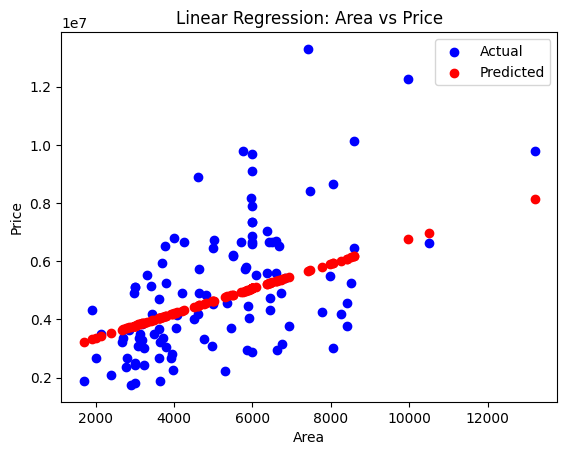

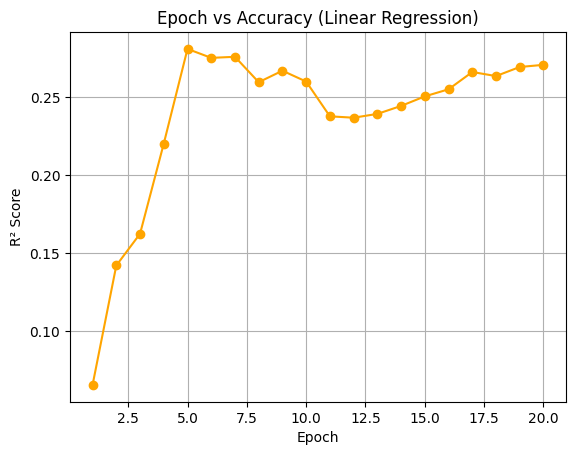

In [2]:
# Import libraries
import pandas as pd                                   # for handling tabular data (CSV, DataFrame, etc.)
import numpy as np                                    # for numerical operations (arrays, math functions)
import matplotlib.pyplot as plt                       # for plotting graphs
from sklearn.linear_model import LinearRegression     # for Linear Regression model
from sklearn.metrics import r2_score                  # to evaluate accuracy (R² score)
from sklearn.model_selection import train_test_split  # to split dataset into training/testing sets
import kagglehub                                      # to download datasets from Kaggle

# 1. Download dataset with kagglehub
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")  # downloads dataset locally
print("Dataset files are in:", path)                                 # prints location of downloaded dataset

# Load the CSV file
df = pd.read_csv(path + "/Housing.csv")  # read Housing.csv into a DataFrame
print("Dataset shape:", df.shape)        # prints rows × columns count
print(df.head())                         # shows first 5 rows for a quick look


# 2. Select feature(s) and target
                            # Independent variable (X): size of house ("area")
X = df[['area']].values     # selecting only "area" column as input feature, reshape into 2D array

                            # Dependent variable (y): target to predict ("price")
y = df['price'].values      # selecting "price" column as output/target


# 3. Split into training and test sets
# Dividing dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 4. Train Linear Regression
model = LinearRegression()       # create a Linear Regression model
model.fit(X_train, y_train)      # train model on training data (finds slope & intercept)

# 5. Evaluate model
predictions = model.predict(X_test)                    # predict prices on test data
r2 = r2_score(y_test, predictions)                     # calculate R² score (how well model fits data)
print(f"Slope (area → price): {model.coef_[0]:.4f}")   # prints slope (relationship strength)
print(f"Intercept: {model.intercept_:.4f}")            # prints intercept (bias)
print(f"R² (test set): {r2:.3f}")                      # prints accuracy (closer to 1 = better fit)



# 6. Plot actual vs predictions
plt.scatter(X_test, y_test, color='blue', label='Actual')        # actual data points
plt.scatter(X_test, predictions, color='red', label='Predicted') # predicted data points
plt.xlabel("Area")            # label x-axis
plt.ylabel("Price")           # label y-axis
plt.title("Linear Regression: Area vs Price")  # graph title
plt.legend()                  # show labels ("Actual" & "Predicted")
plt.show()                    # display the plot



# 7. Epoch vs Accuracy (simulate training over time)
epochs = 20           # total "training rounds" to simulate
r2_scores = []        # to store accuracy at each epoch

for epoch in range(1, epochs + 1):
    idx = epoch * 20  # gradually increase training sample size
    model = LinearRegression()   # new model each epoch
    model.fit(X_train[:idx], y_train[:idx])  # train only on a small part of training set
    pred = model.predict(X_test)             # predict on test set
    r2_scores.append(r2_score(y_test, pred)) # store accuracy


# Plot accuracy over epochs
plt.plot(range(1, epochs + 1), r2_scores, marker='o', color="orange")
plt.xlabel("Epoch")               # label x-axis
plt.ylabel("R² Score")            # label y-axis
plt.title("Epoch vs Accuracy (Linear Regression)") # graph title
plt.grid(True)                    # add gridlines
plt.show()                        # display the plot




**R² Score**

---



* R² = how much of the variation in price can be explained by area.

* R² = 1 → perfect fit

* R² = 0 → model is useless (just guessing the average price)



**Relation to "Epoch vs Accuracy" graph**

---



* In neural networks, “epoch vs accuracy” shows how the model improves with training.

* For regression, we don’t plot accuracy — we can plot R² (goodness of fit) or loss (MSE) across epochs.

* So in your graph:

    * X-axis = epoch (training step)

    * Y-axis = R² score (how good the fit is)

That graph basically shows how your regression model is learning to predict prices better and better as epochs increase.